In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [2]:
data_folder = ''
dataset = 'KME_planes.xyz'

In [3]:
x,y,z,illuminance,reflectance,intensity,nb_of_returns =  np.loadtxt(dataset,skiprows=1, delimiter=';' , unpack=True)

Text(0, 0.5, 'Z-axis ')

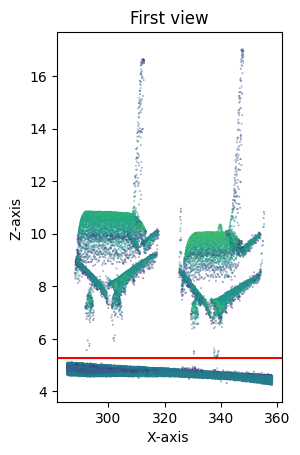

In [4]:
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.scatter(x, z, c=intensity, s=0.05)
plt.axhline(y=np.mean(z), color='r', linestyle='-')
plt.title('First view')
plt.xlabel('X-axis ')
plt.ylabel('Z-axis ')

Text(0, 0.5, 'Z-axis ')

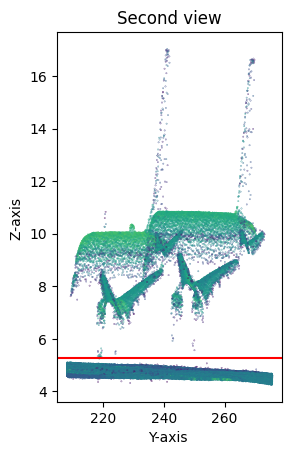

In [5]:
plt.subplot(1, 2, 2) # index 2
plt.scatter(y, z, c=intensity, s=0.05)
plt.axhline(y=np.mean(z), color='r', linestyle='-')
plt.title('Second view')
plt.xlabel('Y-axis ')
plt.ylabel('Z-axis ')

In [6]:
plt.show()

In [7]:
pcd = np.column_stack((x,y,z))
mask = z > np.mean(z)
spatial_query = pcd[z>np.mean(z)]

In [8]:
pcd.shape==spatial_query.shape 

False

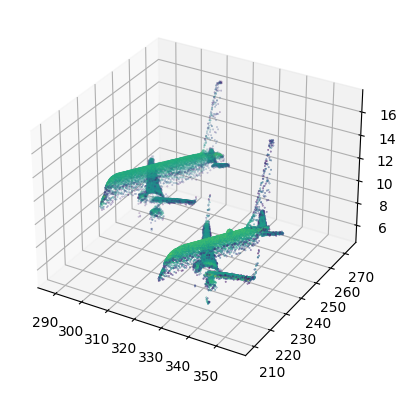

In [9]:
ax = plt.axes(projection='3d')
ax.scatter(x[mask], y[mask], z[mask], c = intensity[mask], s=0.1)
plt.show()

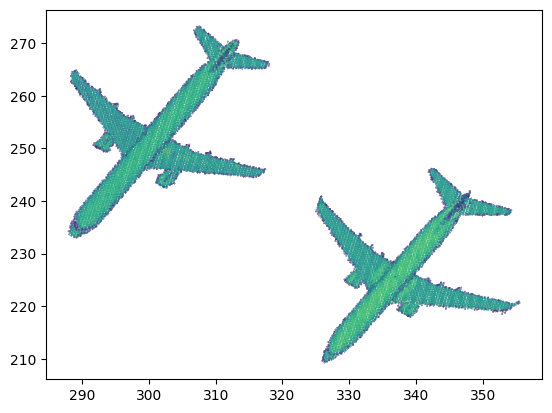

In [10]:
plt.scatter(x[mask], y[mask], c=intensity[mask], s=0.1)
plt.show()

In [11]:
X=np.column_stack((x[mask], y[mask]))

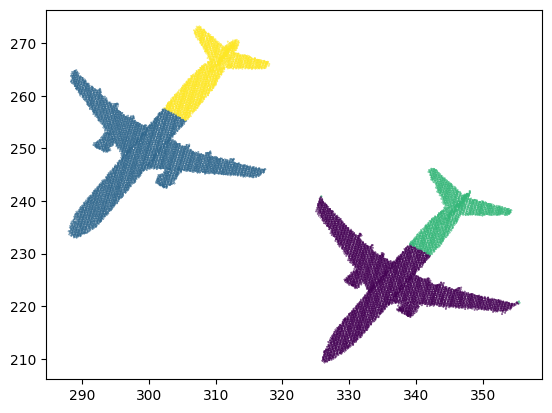

In [14]:
kmeans = KMeans(n_clusters=4).fit(X)
plt.scatter(x[mask], y[mask], c=kmeans.labels_, s=0.1)
plt.show()

In [15]:
from tqdm import tqdm

In [16]:
X=np.column_stack((x[mask], y[mask], z[mask]))
wcss = [] 
for i in tqdm(range(1, 20)):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

100%|██████████| 19/19 [00:26<00:00,  1.39s/it]


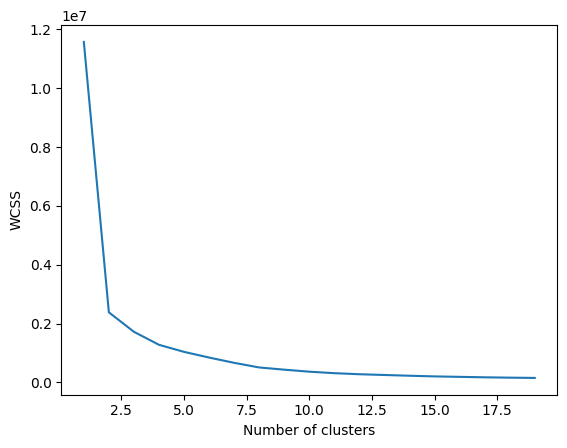

In [17]:
plt.plot(range(1, 20), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [18]:
dataset="KME_cars.xyz"
x,y,z,r,g,b = np.loadtxt(data_folder+dataset,skiprows=1, delimiter=';', unpack=True)
X=np.column_stack((x,y,z))
kmeans = KMeans(n_clusters=3).fit(X)

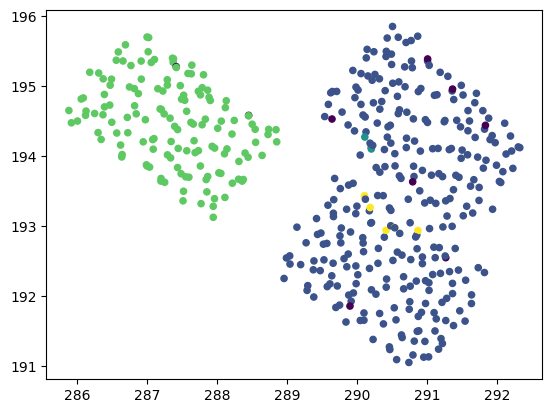

In [19]:
clustering = DBSCAN(eps=0.5, min_samples=2).fit(X)
plt.scatter(x, y, c=clustering.labels_, s=20)
plt.show()

In [41]:
X=np.column_stack((x[mask], y[mask], z[mask], illuminance[mask], nb_of_returns[mask], intensity[mask]))
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
plt.scatter(x[mask], y[mask], c=kmeans.labels_, s=0.1)
plt.show()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 447 but corresponding boolean dimension is 144709